In [432]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statistics as st
import seaborn as sns
import matplotlib.style as style
from scipy.stats import skew
from scipy import stats
import matplotlib.gridspec as gridspec
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import  KFold

In [403]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [404]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [405]:
c_drop = ['Alley','PoolQC','Fence','MiscFeature','Id']
train_data.drop(columns=c_drop,inplace=True)
test_data.drop(columns=c_drop,inplace=True)

In [406]:
cat_train = [cat for cat in train_data if train_data[cat].dtype=='object']
num_train = [cat for cat in train_data if train_data[cat].dtype=='int64' or train_data[cat].dtype=='float64']

cat_test = [ct_test for ct_test in test_data if test_data[ct_test].dtype=='object']
num_test = [ct_test for ct_test in test_data if test_data[ct_test].dtype=='int64' or test_data[ct_test].dtype=='float64']

In [407]:
for col in cat_train:
    train_data[col] = train_data[col].fillna(st.mode(train_data[col].dropna()))

for col in num_train:
    train_data[col] = train_data[col].fillna(st.mode(train_data[col].dropna()))

In [408]:
for ct_test in cat_test:
    test_data[ct_test] = test_data[ct_test].fillna(st.mode(test_data[ct_test].dropna()))

for ct_test in num_test:
    test_data[ct_test] = test_data[ct_test].fillna(st.mode(test_data[ct_test].dropna()))

In [409]:
le = LabelEncoder()

In [410]:
for col in cat_train:
    train_data[col] = le.fit_transform(train_data[col])
    
for ct_test in cat_test:
    test_data[ct_test] = le.fit_transform(test_data[ct_test])

In [411]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   int32  
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   int32  
 5   LotShape       1460 non-null   int32  
 6   LandContour    1460 non-null   int32  
 7   Utilities      1460 non-null   int32  
 8   LotConfig      1460 non-null   int32  
 9   LandSlope      1460 non-null   int32  
 10  Neighborhood   1460 non-null   int32  
 11  Condition1     1460 non-null   int32  
 12  Condition2     1460 non-null   int32  
 13  BldgType       1460 non-null   int32  
 14  HouseStyle     1460 non-null   int32  
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

In [412]:
Correlation = train_data.corr()['SalePrice']
Correlation[np.argsort(Correlation)[::-1]]

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
                  ...   
HeatingQC      -0.400178
GarageFinish   -0.537242
KitchenQual    -0.589189
BsmtQual       -0.618025
ExterQual      -0.636884
Name: SalePrice, Length: 76, dtype: float64

In [413]:
num_feat=train_data.columns[train_data.dtypes!=object]
num_feat=num_feat[1:-1] 
labels = []
values = []
for col in num_feat:
    labels.append(col)
    values.append(np.corrcoef(train_data[col].values, train_data.SalePrice.values)[0,1])

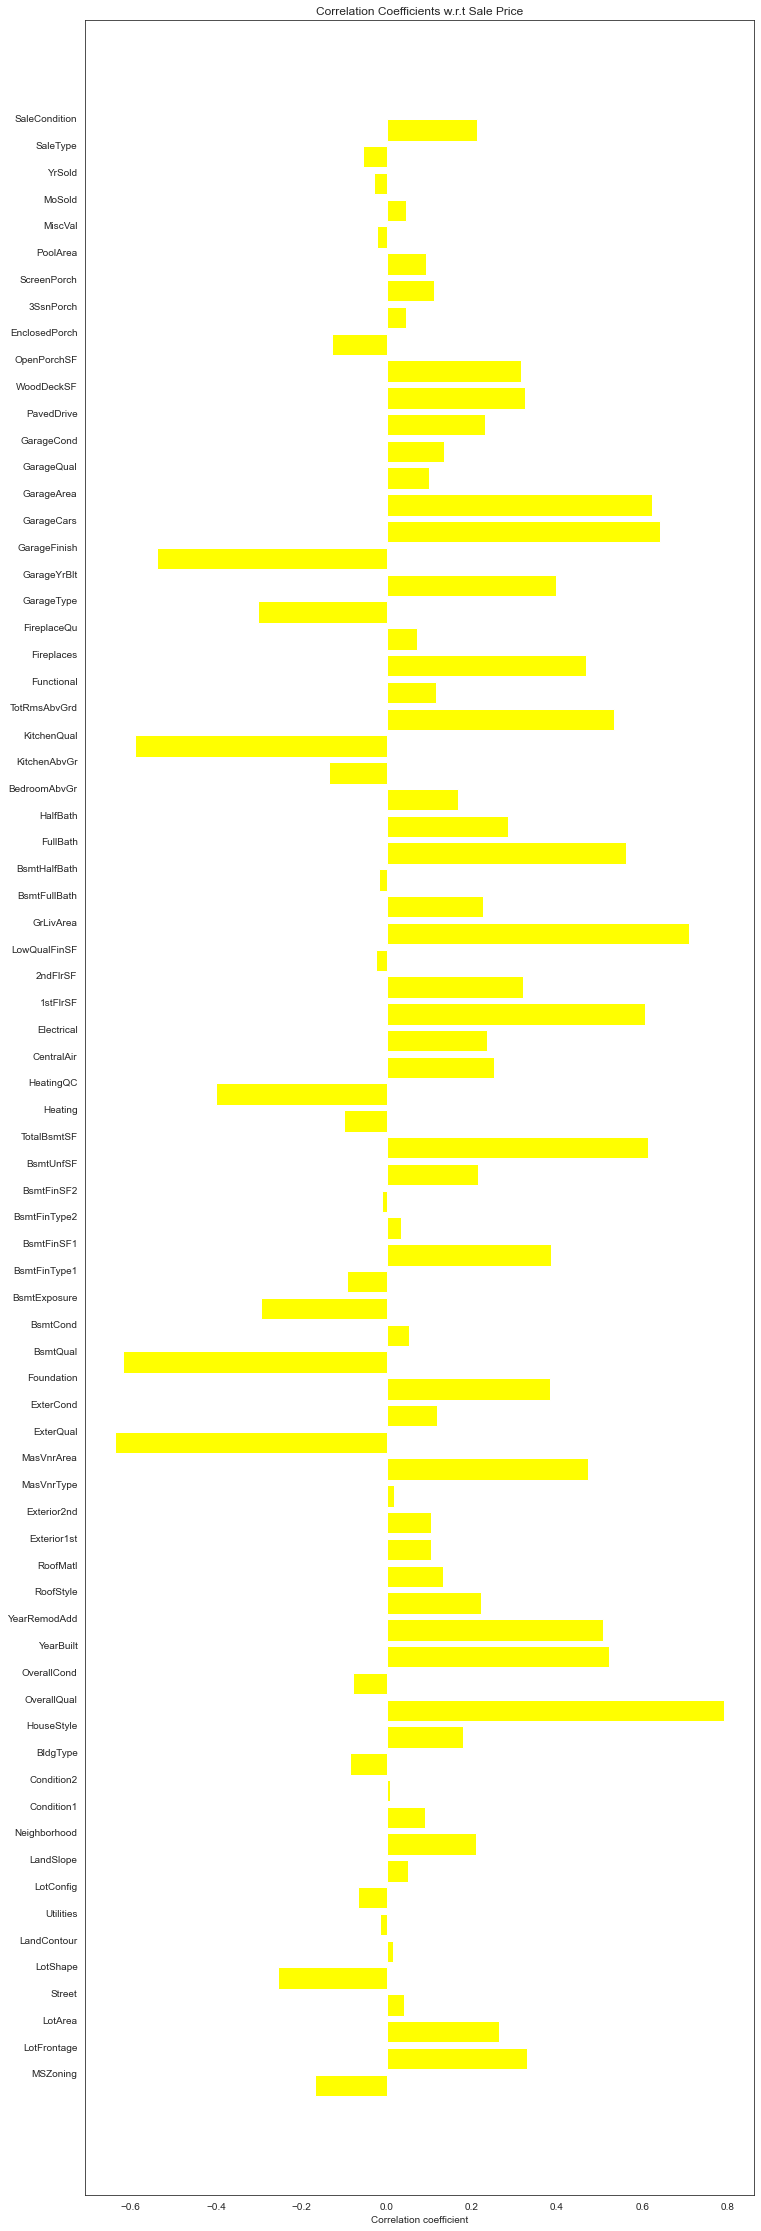

In [414]:
ind = np.arange(len(labels))
width = 0.9
fig, ax = plt.subplots(figsize=(12,40))
rects = ax.barh(ind, np.array(values), color='Yellow')
ax.set_yticks(ind+((width)/2.))
ax.set_yticklabels(labels, rotation='horizontal')
ax.set_xlabel("Correlation coefficient")
ax.set_title("Correlation Coefficients w.r.t Sale Price");

C:\Users\Nakkarin Tepin\anaconda3\envs\TF2\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


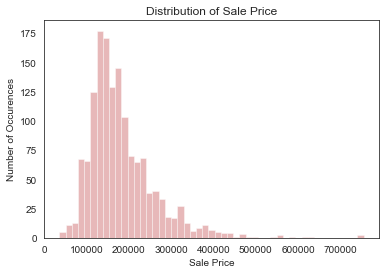

In [415]:
sns.distplot(train_data['SalePrice'], color='r', kde = False)
plt.title("Distribution of Sale Price")
plt.ylabel("Number of Occurences")
plt.xlabel("Sale Price");

# Multivariate Analysis

# MasVnrType and MasVnrArea

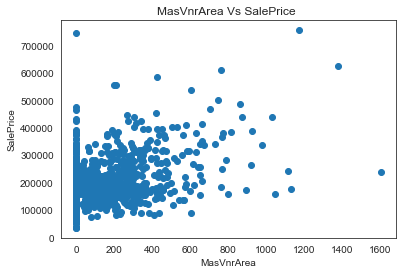

In [416]:
plt.scatter(train_data["MasVnrArea"],train_data["SalePrice"])
plt.title("MasVnrArea Vs SalePrice ")
plt.ylabel("SalePrice")
plt.xlabel("MasVnrArea");

C:\Users\Nakkarin Tepin\anaconda3\envs\TF2\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


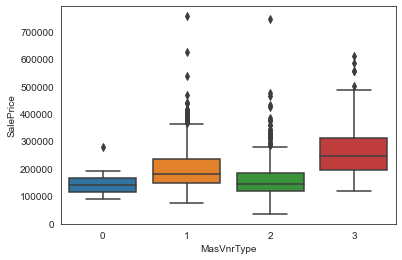

In [417]:
sns.boxplot("MasVnrType","SalePrice",data=train_data);

# Electrical 

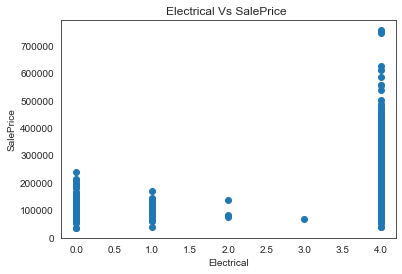

In [418]:
plt.scatter(train_data["Electrical"],train_data["SalePrice"])
plt.title("Electrical Vs SalePrice ")
plt.ylabel("SalePrice")
plt.xlabel("Electrical");

C:\Users\Nakkarin Tepin\anaconda3\envs\TF2\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


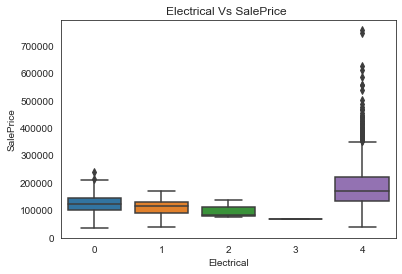

In [419]:
sns.boxplot("Electrical","SalePrice",data = train_data)
plt.title("Electrical Vs SalePrice ")
plt.ylabel("SalePrice")
plt.xlabel("Electrical");

# Basement Features

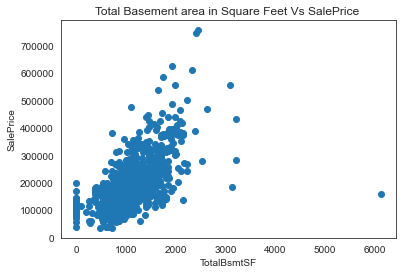

In [420]:
plt.scatter(train_data["TotalBsmtSF"],train_data["SalePrice"])
plt.title("Total Basement area in Square Feet Vs SalePrice ")
plt.ylabel("SalePrice")
plt.xlabel("TotalBsmtSF");

# Garages

C:\Users\Nakkarin Tepin\anaconda3\envs\TF2\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


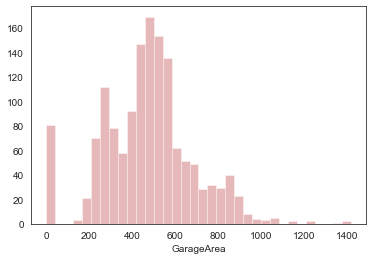

In [421]:
sns.distplot(train_data["GarageArea"],color='r', kde=False);

In [422]:
conut = len(train_data['GarageArea'])

for i in range(conut):
    if train_data['GarageArea'][i] == 0:
        train_data.at[i, 'GarageArea'] = np.mean(train_data['GarageArea'])
    else:
        None

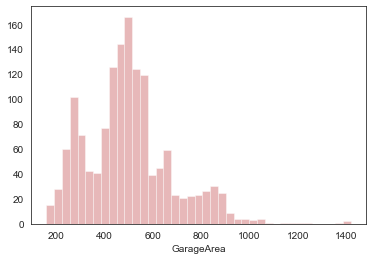

In [423]:
sns.distplot(train_data["GarageArea"],color='r', kde=False);

C:\Users\Nakkarin Tepin\anaconda3\envs\TF2\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


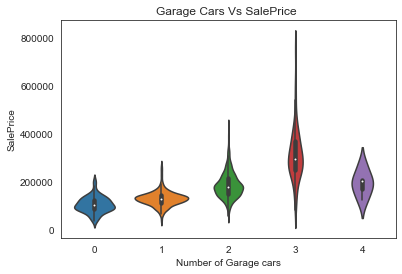

In [424]:
sns.violinplot(train_data["GarageCars"],train_data["SalePrice"])
plt.title("Garage Cars Vs SalePrice ")
plt.ylabel("SalePrice")
plt.xlabel("Number of Garage cars");

# 1st Floor in square feet

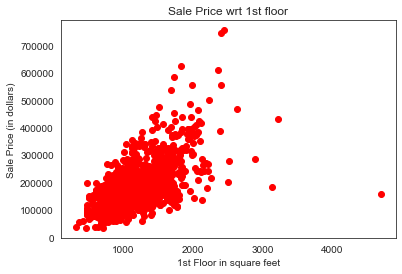

In [425]:
plt.scatter(train_data["1stFlrSF"],train_data.SalePrice, color='red')
plt.title("Sale Price wrt 1st floor")
plt.ylabel('Sale Price (in dollars)')
plt.xlabel("1st Floor in square feet");

# Ground Living Area w.r.t SalePrice


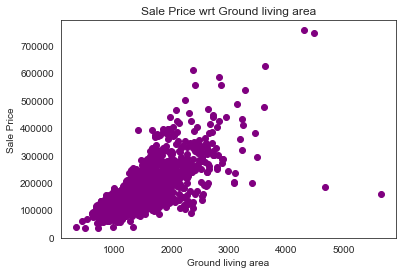

In [426]:
plt.scatter( train_data["GrLivArea"],train_data["SalePrice"],color='purple')
plt.title("Sale Price wrt Ground living area")
plt.ylabel('Sale Price')
plt.xlabel("Ground living area");

# Garage Area

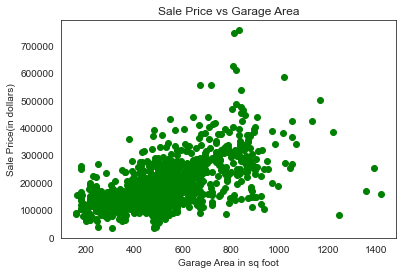

In [427]:
plt.scatter(train_data["GarageArea"],train_data.SalePrice, color='green')
plt.title("Sale Price vs Garage Area")
plt.ylabel('Sale Price(in dollars)')
plt.xlabel("Garage Area in sq foot");

# YearBuilt

C:\Users\Nakkarin Tepin\anaconda3\envs\TF2\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


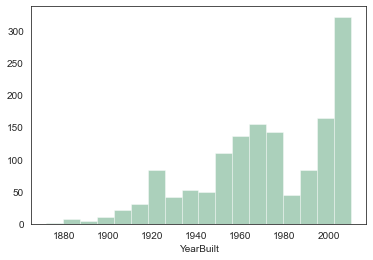

In [428]:
sns.distplot(train_data["YearBuilt"],color='seagreen', kde=False);

C:\Users\Nakkarin Tepin\anaconda3\envs\TF2\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


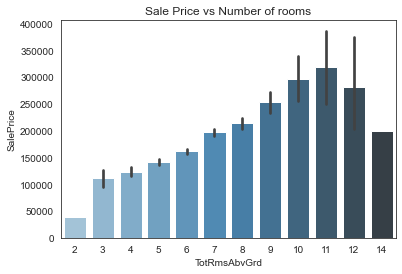

In [429]:
sns.barplot(train_data["TotRmsAbvGrd"],train_data["SalePrice"],palette="Blues_d")
plt.title("Sale Price vs Number of rooms");

# Machine Learning

In [431]:
X_train = train_data.iloc[: , :-1].values
y_train = train_data.iloc[: , -1].values
X_test = test_data.iloc[: , :].values

X_train,X_test,y_train,y_test = train_test_split(X_train,y_train,random_state=0,test_size=0.25)

In [433]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(X_train,y_train)

DecisionTreeRegressor(random_state=0)

In [434]:
y_pred = regressor.predict(X_test).reshape(-1,1)
y_test = y_test.reshape(-1,1)

In [435]:
errors = abs(y_pred - y_test)
print('Metrics for DecisionTreeRegressor Trained on Original Data')
mape = 100 * (errors / y_test)
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 5), '%.')

Metrics for DecisionTreeRegressor Trained on Original Data
Accuracy: 85.52646 %.
